In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('2019_Winter_Data_Science_Intern_Challenge_Data_Set_Sheet1.csv')

In [3]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [4]:
pd.Series(data['user_id']).is_unique

False

In [5]:
data['shop_id'].nunique()

100

In [6]:
data['created_at'] = pd.to_datetime(data['created_at']).dt.date

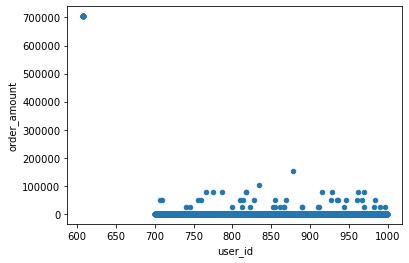

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data.plot(x ='user_id', y='order_amount', kind = 'scatter')
plt.show()

In [8]:
import numpy as np

Q1 = np.percentile(data['order_amount'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['order_amount'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR 
print("Old Shape: ", data.shape)
 

Old Shape:  (5000, 7)


In [9]:
# Upper bound
upper = np.where(data['order_amount'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['order_amount'] <= (Q1-1.5*IQR))

data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)


New Shape:  (4859, 7)


In [ ]:
Total = data['order_amount'].sum()
Total/4859

In [11]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,2497.395966,49.852645,849.905742,293.715374,1.950196
std,1443.356555,29.049171,86.887496,144.453395,0.919791
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1244.500000,24.000000,776.000000,162.000000,1.000000
50%,2498.000000,50.000000,850.000000,280.000000,2.000000
75%,3749.500000,74.000000,925.000000,380.000000,3.000000
max,5000.000000,100.000000,999.000000,730.000000,5.000000


## ---------------------------------------------------------------------------------------------

# Data Science Questions 
##                                  Question 1:




### a.Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

#### Answer: The calculation was heavily effected by the outliers which are orders with extremely high order amount. If median is used instead of average, a more reasonale number can be found in the orginal data for representative order amount. Alternatively, I also removed the outliers from the data and calculated the AOV in the same manner, which also resulted in a reasonable representation of the order amount. 



### b. What metric would you report for this dataset?

#### Answer: I chose the median of order amount. 



### c. What is its value?

#### Answer: 284
